<a href="https://colab.research.google.com/github/audrb1999/ML-DL-Study/blob/main/Tensorflow/%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC/06._Rnn_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [ ]:

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)

(60000, 28, 28)


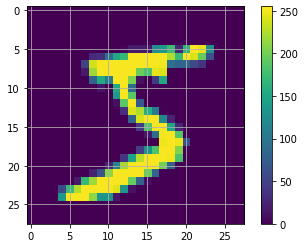

In [ ]:
plt.imshow(train_images[0])
plt.colorbar() # 픽셀 값 범위를 알 수 있음
plt.grid(True)
plt.show()

In [ ]:
train_images.dtype

dtype('uint8')

In [ ]:
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)



일반적으로 0-1사의의 값을 가지게 하기 위해서는 다음 수식을 사용합니다.

$$normalize(x) = \frac{x - 최소값}{최대값 - 최소값}$$

이 경우 최소값이 0이기 떄문에 다음과 같이 간편하게 구할 수 있습니다.

$$normalize(x) = \frac{x}{최대값}$$

In [ ]:

train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
train_5 = train_images[0:5]

train_5.shape

(5, 28, 28)

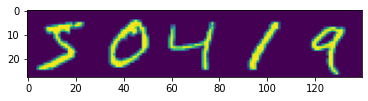

In [ ]:
# np.hstack은 height 방향의 배열을 풀어서 width 방향으로 연결해줍니다.

a = np.hstack(train_5)
plt.imshow(a)
plt.show()

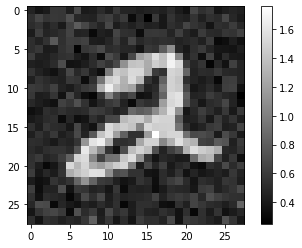

In [ ]:
plt.imshow(noisy_image, cmap="gray")
plt.colorbar()
plt.show()

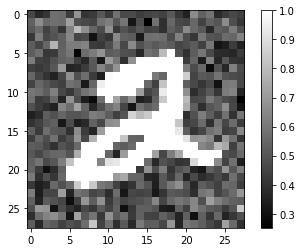

In [ ]:
noisy_image[noisy_image > 1.0] = 1.0
plt.imshow(noisy_image, cmap="gray")
plt.colorbar()
plt.show()

In [ ]:
train_noisy_images = train_images +  np.random.normal(0.5, 0.1, (28, 28))
train_noisy_images[train_noisy_images>1] = 1.0

test_noisy_images = test_images + np.random.normal(0.5, 0.1, (28, 28))
test_noisy_images[test_noisy_images > 1] = 1.0

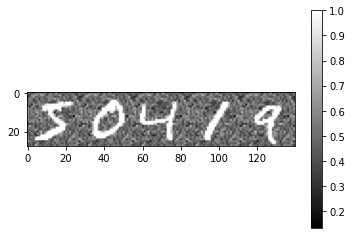

In [ ]:
plt.imshow(train_noisy_images[:5].transpose( (1, 0, 2) ).reshape(28, -1), cmap="gray")
plt.colorbar()
plt.show()

In [ ]:
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print(train_labels.shape)

(60000, 10)


In [ ]:
from keras.models import Model

inputs = Input(shape = (28, 28))

x1 = SimpleRNN(64, activation='tanh')(inputs)
x2 = Dense(10, activation='softmax')(x1)
model = Model(inputs, x2)

In [ ]:
model.summary()

# sequential model 은 인풋이 없다.

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 64)                5952      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics= 'accuracy')

In [ ]:
hist = model.fit(train_noisy_images, train_labels, validation_data=(test_noisy_images, test_labels), epochs=5, verbose=2)

# 인풋 레이어가 있냐 없냐 차이로 정확도 차이가 남 있으면 잘 됨

Epoch 1/5
1875/1875 - 29s - loss: 0.6594 - accuracy: 0.7916 - val_loss: 0.5105 - val_accuracy: 0.8364
Epoch 2/5
1875/1875 - 28s - loss: 0.3298 - accuracy: 0.9013 - val_loss: 0.6826 - val_accuracy: 0.7735
Epoch 3/5
1875/1875 - 28s - loss: 0.2706 - accuracy: 0.9205 - val_loss: 0.3564 - val_accuracy: 0.8917
Epoch 4/5
1875/1875 - 28s - loss: 0.2324 - accuracy: 0.9314 - val_loss: 0.5489 - val_accuracy: 0.8408
Epoch 5/5
1875/1875 - 28s - loss: 0.2204 - accuracy: 0.9352 - val_loss: 0.3999 - val_accuracy: 0.8721


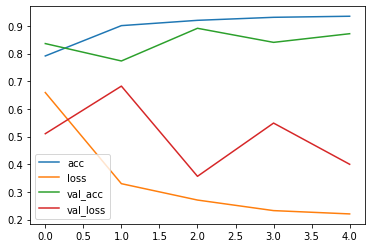

In [ ]:
plt.plot(hist.history['accuracy'], label = 'acc')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_accuracy'], label = 'val_acc')
plt.plot(hist.history['val_loss'], label = 'val_loss')

plt.legend(loc = 'under letf')

plt.show()

In [ ]:
res = model.predict(test_images[0].reshape(1, 28, 28))

np.argmax(res)

7

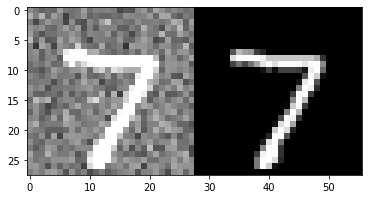

In [ ]:
plt.imshow(np.hstack((test_noisy_images[0], test_images[0])), cmap = 'gray')
plt.show()

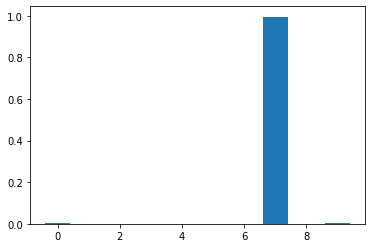

In [ ]:
plt.bar(np.arange(10), res[0])
plt.show()